# Introduction

In this notebook, we will get started by importing and cleaning the LendingClub dataset, which will be used throughout the course.

We will achieve this by leveraging key data cleaning techniques in Python using Pandas, among other libraries.


## Agenda:
1. Importing data for your Data Science project
2. Understanding your data and cleaning it:initial exploration and stats
3. Handling missing values
4. Removing duplicates
5. Handling outliers
6. Text data handling
7. Intro to time series data


Demo: Implementation in Python
------------------------------


---


### Set up

#### User-specified parameters

In [1]:
python_material_folder_name = "python-material"

#### Import libraries

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True
except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."

1\. Importing data for your Data Science project
----------------------------------------

### Flat file (.csv) format
Our data is stored in csv format which is a very popular tabular format, where each line corresponds to a row, and each field within the row is separated by a comma.

Csv is widely used for data exchange and storage, especially for datasets that need to be easily readable and editable with spreadsheet software (like Microsoft Excel) and programming languages (like Python, R).

- Advantages: Simple, easy to create and parse, human-readable.
- Disadvantages: Can become large and unwieldy with big datasets, lacks support for complex data structures.

Let's read our data in using [**pandas**](https://pandas.pydata.org/docs/getting_started/index.html#getting-started), Python's most popular library for data manipulation.

**Note:** Thorughout this course, data will be located in the *data* folder within the code area.

### Other formats
- See [data import cheat sheet(text files, SAS files, Excel files, relational databases, etc.](https://www.datacamp.com/cheat-sheet/importing-data-in-python-cheat-sheet)
- [Read data from APIs](https://medium.com/analytics-lane/python-get-and-process-web-api-data-through-pandas-and-requests-part-1-32127638b463)

In [3]:
# Load the dataset
# Note: optionally, added a 'sample' step to reduce size if facing slowdown/computational challenges.
df = pd.read_csv(rf"{path_python_material}/data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv")#.sample(100)

# Display the first few rows of the dataset
df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10

In [4]:
df.columns[:5]

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt'], dtype='object')

In [5]:
df.dtypes[:5]

Unnamed: 0.1      int64
Unnamed: 0        int64
id                int64
loan_amnt       float64
funded_amnt     float64
dtype: object

**Hint**: Check out data types [here](https://pbpython.com/pandas_dtypes.html)

### <span style="color:BLUE"> **>>> DISCUSSION: What are some of the things you notice by just looking at the data?**  </span>    
*Hints*:
- You may want to take a look at the data dictionary provided in the 'data' folder
- Do you understand what each column, and the values within it, is or means?
- Do you notice any inconsistencies or potential areas of concern around data quality or completeness?


2\. Understanding your data and cleaning it: initial exploration and stats
----------------------------------------


In [6]:
list_to_drop = ['Unnamed: 0.1', 'Unnamed: 0'] # Add columns to drop here
# Drop columns
df_dropped = df.drop(columns=list_to_drop)

<b>Reasons to drop:</b>
1. Unnamed and Uninterpretable data
2. Not useful in our case

In [7]:
print(f"df shape: {df.shape}")
print(f"df_dropped shape: {df_dropped.shape}")

df shape: (100000, 143)
df_dropped shape: (100000, 141)


In [8]:
df_dropped['term'] = df['term'].str.replace(' months', '').astype(int)

In [9]:
df_dropped['int_rate'] = df_dropped['int_rate'].str.replace('%', '').astype(float) / 100


### Basic data exploration and stats

In [10]:
# Descriptive statistics of the numeric columns
print("\nDescriptive Statistics:")
df_dropped.describe().apply(lambda x: x.apply('{0:.2f}'.format))


Descriptive Statistics:


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,99898.00,100000.00,100000.00,100000.00,100000.00,47186.00,14630.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,99994.00,24602.00,100000.00,7166.00,7166.00,100000.00,97562.00,97562.00,70356.00,70356.00,70356.00,70356.00,68227.00,70356.00,60315.00,70356.00,70356.00,70356.00,70343.00,97562.00,70356.00,70356.00,70356.00,98222.00,97560.00,97152.00,97101.00,99994.00,100000.00,94627.00,97562.00,97562.00,97562.00,98222.00,97212.00,21943.00,87190.00,31658.00,97562.00,97562.00,97562.00,97949.00,97562.00,97562.00,97562.00,97562.00,97562.00,97949.00,94488.00,97562.00,97562.00,97562.00,97558.00,97133.00,99955.00,99995.00,97562.00,98222.00,98222.00,97562.00,6739.00,6740.00,6740.00,6740.00,6740.00,6740.00,6613.00,6740.00,6740.00,6740.00,6740.00,4895.00,6222.00,4895.00,4895.00,6127.00,6222.00,6222.00
mean,97894846.43,15332.37,15328.22,15313.24,43.11,0.13,451.71,80029.18,19.33,0.28,700.64,704.64,0.55,35.03,74.95,11.69,0.18,16893.49,24.04,4032.02,4031.44,12559.49,12544.53,9911.41,2479.31,1.75,167.02,28.61,3512.91,690.48,677.66,0.02,44.63,1.00,129576.41,19.41,0.00,208.06,145926.39,0.93,2.84,0.70,1.62,20.32,36927.16,68.99,1.25,2.65,5999.96,56.15,36397.94,1.08,1.52,2.00,4.51,13757.23,12779.26,55.84,0.01,10.71,125.75,179.95,14.46,8.33,1.51,25.10,39.34,7.09,36.19,0.48,3.70,5.59,4.86,7.64,8.56,8.27,13.79,5.55,11.70,0.00,0.00,0.08,2.08,94.36,40.05,0.12,0.04,183847.54,52791.50,24834.48,45613.08,36437.39,673.89,677.89,0.63,1.55,11.73,56.51,3.10,12.63,0.04,0.07,2.23,120.75,2.23,2.23,375.98,12004.90,754.78
std,51147363.88,9468.19,9467.42,9470.92,10.96,0.05,273.02,87224.34,17.28,0.82,33.80,33.80,0.86,21.92,26.56,5.75,0.55,22398.29,12.06,7465.24,7464.71,10337.36,10333.63,8669.89,2766.02,13.42,808.29,143.59,6189.95,74.90,115.21,0.14,21.62,0.00,67997.55,7.93,0.06,1680.48,164456.91,1.13,3.03,0.94,1.60,25.24,46072.93,23.48,1.49,2.56,5513.92,20.80,35823.65,1.50,2.72,2.35,3.17,16693.22,18099.39,28.84,0.10,694.93,54.48,98.40,17.99,9.27,1.87,32.51,22.55,5.97,22.21,1.35,2.38,3.41,3.12,4.69,7.43,4.79,8.04,3.34,5.76,0.02,0.05,0.46,1.8

In [11]:
df_dropped.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,167338079,4000.0,4000.0,4000.0,36,0.1308,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,71016917,24000.0,24000.0,24000.0,60,0.0916,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,39589826,5000.0,5000.0,5000.0,36,0.1049,162.49,B,B3,driver,10+ years,MORTGAGE,55000.0,Not Verified,Jan-2015,Fully Paid,n,https://lendingclub.com/bro

This table can be slightly overwhelming to digest, but is very useful to get a sense of our data.

#### Categorical columns

In [12]:
df_dropped.loan_status.value_counts()

loan_status
Fully Paid                                             51189
Current                                                35294
Charged Off                                            12384
Late (31-120 days)                                       535
In Grace Period                                          329
Late (16-30 days)                                         90
Does not meet the credit policy. Status:Fully Paid        69
Issued                                                    63
Does not meet the credit policy. Status:Charged Off       33
Default                                                   14
Name: count, dtype: int64

*Useful definitions:*  
- *Defaulted Loan: A loan is considered in default when the borrower fails to make the required payments as agreed in the loan contract. Default typically occurs after missing several payments (usually 90 to 180 days, depending on the type of loan and lender policies).*
- *A loan is charged off when the lender writes off the loan as a bad debt on their financial statements, recognizing it as a loss. This typically happens after the loan has been in default for a significant period, often around 180 days.*


3\. Handling missing values
----------------------------------------

In [13]:
# Checking for missing values
df_dropped.isnull().sum()


id                                                0
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      8954
emp_length                                     6950
home_ownership                                    0
annual_inc                                        0
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url                                               0
purpose                                           0
title       

In [14]:
# Create hardship flag based on information provided by data SMEs in the business
df_dropped['hardship_status'] = df_dropped['hardship_status'].fillna("No Hardship")

In [15]:
# Missing data summary percentage per column that goes beyong a certain threshold
def null_data_summary(df:pd.DataFrame, threshold_percentage=50) -> pd.DataFrame:
    """
    Returns a DataFrame with the percentage of missing data per column.
    """
    null_data = df.isnull().sum().sort_values(ascending=False)
    null_data = null_data[null_data > 0]
    null_data = null_data.reset_index()
    null_data.columns = ['Column', 'Percentage']
    null_data['Percentage'] = (null_data['Percentage'] / len(df)) * 100
    null_data = null_data[null_data['Percentage'] > threshold_percentage]
    return null_data

null_data_summary(df_dropped, threshold_percentage=50)

,Column,Percentage
0,hardship_loan_status,95.116
1,deferral_term,95.105
2,hardship_dpd,95.105
3,hardship_length,95.105
4,payment_plan_start_date,95.105
5,hardship_type,95.105
6,hardship_end_date,95.105
7,hardship_start_date,95.105
8,hardship_reason,95.105
9,orig_projected_additional_accrued_interest,93.873


In [16]:
# Drop columns with more than threshold_percentage missing values
def drop_columns_with_missing_values(df:pd.DataFrame, threshold_percentage=50) -> pd.DataFrame:
    """
    Drops columns with more than threshold_percentage missing values.
    """
    null_data = df.isnull().sum().sort_values(ascending=False)
    null_data = null_data[null_data > 0]
    null_data = null_data.reset_index()
    null_data.columns = ['Column', 'Percentage']
    null_data['Percentage'] = (null_data['Percentage'] / len(df)) * 100
    columns_to_drop = null_data[null_data['Percentage'] > threshold_percentage]['Column'].tolist()
    df = df.drop(columns=columns_to_drop)
    return df

df_dropped = drop_columns_with_missing_values(df_dropped, threshold_percentage=70)

In [17]:
null_data_summary(df_dropped, threshold_percentage=0)

,Column,Percentage
0,mths_since_recent_revol_delinq,68.342
1,next_pymnt_d,63.573
2,mths_since_last_delinq,52.814
3,il_util,39.685
4,mths_since_rcnt_il,31.773
5,all_util,29.657
6,open_rv_24m,29.644
7,open_acc_6m,29.644
8,inq_last_12m,29.644
9,total_cu_tl,29.644


In [ ]:
# Change mths since last delinq for Nan values and have acc_now_delinq > 0 to a large number
large_value = 999

# Apply the condition
mask = df_dropped['mths_since_last_delinq'].isna() & (df_dropped['acc_now_delinq'] == 0)
df_dropped.loc[mask, 'mths_since_last_delinq'] = large_value

In [ ]:
# Drop next dates columns and columns that are somewhat redundant/need more information to be useful
df_dropped = df_dropped.drop(columns=['next_pymnt_d', 'last_pymnt_d', 'last_credit_pull_d', 'mths_since_recent_revol_delinq', 'il_util', 'all_util'])

# Drop mths_since_recent_bc_dlq as it is highly correlated with mths_since_last_delinq
df_dropped = df_dropped.drop(columns=['mths_since_recent_bc_dlq'])

# Drop remaining rows that still have mths since last delinq as Nan
df_dropped = df_dropped.dropna(subset=['mths_since_last_delinq'])


In [28]:
null_data_summary(df_dropped, threshold_percentage=0)

,Column,Percentage
0,mths_since_recent_revol_delinq,68.342
1,next_pymnt_d,63.573
2,il_util,39.685
3,mths_since_rcnt_il,31.773
4,all_util,29.657
5,open_acc_6m,29.644
6,inq_last_12m,29.644
7,total_cu_tl,29.644
8,inq_fi,29.644
9,max_bal_bc,29.644


In [ ]:
# Assuming nans in these columns mean 0
df_dropped['inq_last_12m'] = df_dropped['inq_last_12m'].fillna(0)
df_dropped['open_acc_6m'] = df_dropped['open_acc_6m'].fillna(0)
df_dropped['chargeoff_within_12_mths'] = df_dropped['chargeoff_within_12_mths'].fillna(0)

4\. Removing duplicates
----------------------------------------

Duplicates can skew your analysis and should be removed to ensure data integrity.

In [18]:
# Checking for duplicate rows
duplicates = df_dropped.duplicated().sum()
duplicates

0

In [19]:
# Removing duplicate rows
df_deduped = df_dropped.drop_duplicates(inplace=True)

try:
    df_deduped.shape # Note: it will fail if empty (i.e. no duplicates)
except:
    print("No duplicates")

No duplicates


5\. Handling outliers
----------------------------------------
Outliers can distort statistical analysis and models. They can be genuine outlying observations (e.g.: Black Friday sales spike), or point to data errors (e.g.: manual data entry). In both cases, we would want to account for this and treat them.

Common techniques to **identify** outliers include:

- Z-score: Identifying outliers based on the standard deviation.
- IQR (Interquartile Range): Identifying outliers based on the 25th and 75th percentiles.

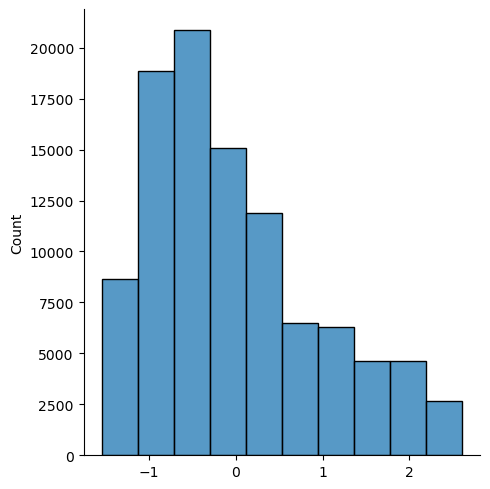

In [20]:
from scipy import stats
import numpy as np
import seaborn as sns

# Calculating on a single column, e.g. loan amount
z_scores = stats.zscore(df_dropped["loan_amnt"])
sns.displot(z_scores, bins = 10)

Observations:
- Loan amount follows a distribution close to normal (a bit 'skewed' to the left)
- Do we have any outliers? This depends on how we define outlier (ie. where we set the threshold), as per example below:

In [21]:
# Threshold = 3
for threshold in np.arange(2,3, 0.25):
    thresh = threshold
    print(f"Threshold == {thresh}, {df_dropped[np.abs(z_scores)>thresh].shape[0]} outliers ")

Threshold == 2.0, 6602 outliers 
Threshold == 2.25, 2605 outliers 
Threshold == 2.5, 2293 outliers 
Threshold == 2.75, 0 outliers 


## Export

In [22]:
df_dropped.to_csv(rf"{path_python_material}/data/2-intermediate/df_out_dsif2.csv", index=False)